<a href="https://colab.research.google.com/github/tirals88/DL_for_everyone/blob/main/deeplearning/notebook/11%EC%9E%A5%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%8B%A4%EB%A3%A8%EA%B8%B0%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'모두의 딥러닝' 책 스터디 내용을 jupyter notebook으로 정리하여 올립니다.

Github 주소 : 'https://github.com/gilbutITbook/080228'

**모두의 딥러닝**

# 11 장 데이터 다루기

모든 딥러닝 실습은 데이터를 분석하고 조사하는 것 부터 시작한다.

이번에는 '피마 인디언들을 대상으로 당뇨병 여부를 측정한 데이터'를 다룰 것이다.

- 샘플 수 : 768
- 속성 : 8 가지
- 1. (pregnant) : 과거 임신 횟수
- 2. (plasma) : 포도당 부하 검사 2시간 후 공복 혈당 농도(mm Hg)
- 3. (pressure) : 확장기 혈압 (mm Hg)
- 4. (thickness) : 삼두근 피부 주름 두께 (mm)
- 5. (insulin) : 혈청 인슐린(2-hour, mu U/ml)
- 6. (BMI): 체질량 지수(BMI, weight in kg/(height in m)$^{2}$)
- 7. (pedigree) : 당뇨병 가족력
- 8. (age) : 나이

- 클래스 : 당뇨(1) / 당뇨 아님(0)

In [18]:
# 피마 인디언, 당뇨병 여부 데이터
# pandas 를 이용해 데이터 받아오기

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/gilbutITbook/080228/master/deeplearning/dataset/pima-indians-diabetes.csv", names = ["pregnant", "plasma", "pressure", "thickness",
                                                                                                                                            "insulin", "BMI", "pedigree", "age", "class"])

# csv 파일에는 데이터를 설명하는 한 줄이 파일 맨 처음에 나온다.
# 하지만 이 파일에는 없기 때문에 names 라는 함수를 통해 속성별 키워드를 지정해주었다.

# 데이터 10개 불러오기
print(df.head(10))

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1
5         5     116        74          0        0  25.6     0.201   30      0
6         3      78        50         32       88  31.0     0.248   26      1
7        10     115         0          0        0  35.3     0.134   29      0
8         2     197        70         45      543  30.5     0.158   53      1
9         8     125        96          0        0   0.0     0.232   54      1


In [19]:
# 전반적인 정보
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [21]:
# 좀 더 자세한 정보
# 데이터 통계자료
print(df.describe())

         pregnant      plasma    pressure   thickness     insulin         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [25]:
# 데이터의 일부 컬럼만 따로 확인
print(df[['pregnant', 'class']])

     pregnant  class
0           6      1
1           1      0
2           8      1
3           1      0
4           0      1
..        ...    ...
763        10      0
764         2      0
765         5      0
766         1      1
767         1      0

[768 rows x 2 columns]


## 데이터 가공하기

이러한 많은 값을 단순히 나열하는 것은 한눈에 들어오지 않는다.

데이터를 잘 다루기 위해서 데이터를 한 번 더 가공해야 하며 무엇을 위해 작업하는 지 목적을 제대로 알아야 한다.

이 프로젝트의 목적은 **당뇨병 발병 예측**이며, 모든 정보들이 당뇨병 발병과 어떤 관계가 있는지를 중점에 놓아야한다.

In [30]:
print(df[['pregnant', 'class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


앞서 살펴본 임신 회수와 당뇨병 발병 확률을 계산한 것으로 추가로 **groupby()** 함수를 사용하였다.

- 먼저 groupby()를 통해 pregnant 정보를 기준으로 하는 새 그룹을 생성한다.

- as_index=False : pregnant 정보 옆에 새로운 인덱스를 만들어준다. ( True 로 놓아도 똑같이 나오긴 한다.)

- mean() 함수를 통해 평균을 구한다.

- sort_values() 함수를 써서 pregnant 컬럼을 오름차순 (ascending)으로 정리하게끔 설정한다.



## matplotlib를 이용해 그래프로 표현하기

잘 정리된 테이블도 그래프로 표현하면 더욱 파악하기 쉽다.

maptlotlib 와 이를 기반으로 좀 더 정교한 그래프를 그리게끔 도와주는 seaborn 라이브러리를 사용해 각 정보끼리 어떤 상관관계가 있는지를 알아볼 수 있다.


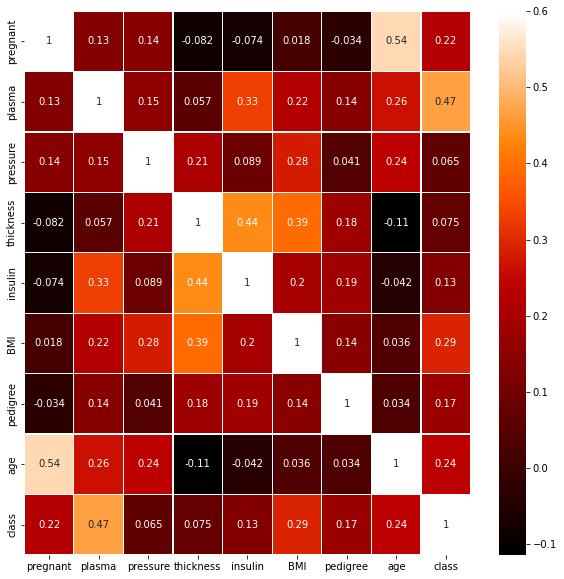

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))

# heatmap() 함수는 두 항목씩 짝을 지은 뒤 각각 어떤 패턴으로 변화하는지를 관찰하는 함수
# 두 항목이 전혀 다른 패턴으로 변화하고 있으면 0을, 서로 비슷한 패턴으로 변할수록 1에 가까운 값을 출력
sns.heatmap(df.corr(), linewidths=.1, vmax=.6, cmap=plt.cm.gist_heat, linecolor='white', annot=True)

# vmax 는 색상의 밝기를 조절
# cmap 은 미리 정해진 matplotlib 색상의 설정값을 불러옮
# annot 은 각 cell 의 값을 표기유무 / fmt='.3f' 와 같이 데이터 형태 지정 가능 (d=정수 / .2f 소수점 2째자리까지)

In [36]:
# 데이터간 상관관계
print(df.corr())

           pregnant    plasma  pressure  thickness   insulin       BMI  \
pregnant   1.000000  0.129459  0.141282  -0.081672 -0.073535  0.017683   
plasma     0.129459  1.000000  0.152590   0.057328  0.331357  0.221071   
pressure   0.141282  0.152590  1.000000   0.207371  0.088933  0.281805   
thickness -0.081672  0.057328  0.207371   1.000000  0.436783  0.392573   
insulin   -0.073535  0.331357  0.088933   0.436783  1.000000  0.197859   
BMI        0.017683  0.221071  0.281805   0.392573  0.197859  1.000000   
pedigree  -0.033523  0.137337  0.041265   0.183928  0.185071  0.140647   
age        0.544341  0.263514  0.239528  -0.113970 -0.042163  0.036242   
class      0.221898  0.466581  0.065068   0.074752  0.130548  0.292695   

           pedigree       age     class  
pregnant  -0.033523  0.544341  0.221898  
plasma     0.137337  0.263514  0.466581  
pressure   0.041265  0.239528  0.065068  
thickness  0.183928 -0.113970  0.074752  
insulin    0.185071 -0.042163  0.130548  
BMI    